In [649]:
#1. Read the dataset to the python environment.

In [650]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [651]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [652]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [653]:
#2. pre-processing the data

In [654]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [655]:
df['SL'].fillna(df['SL'].median(), inplace = True)
df.dropna(subset=['SW'],inplace=True)
df.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

In [656]:
df.dropna(subset=['PL'],inplace=True)
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

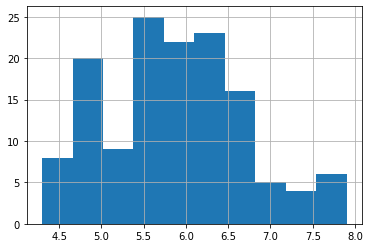

In [657]:
# HISTOGRAM
df['SL'].hist()

<AxesSubplot:>

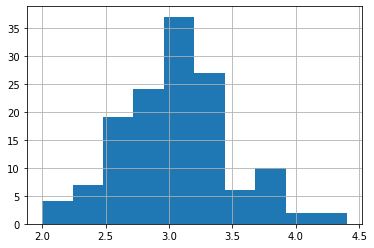

In [658]:
df['SW'].hist()

<AxesSubplot:>

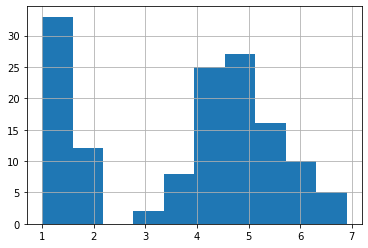

In [659]:
df['PL'].hist()

<AxesSubplot:>

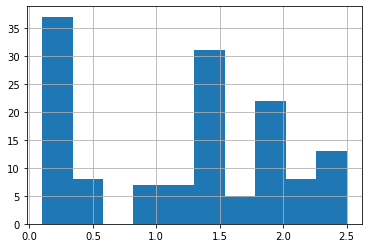

In [660]:
df['PW'].hist()

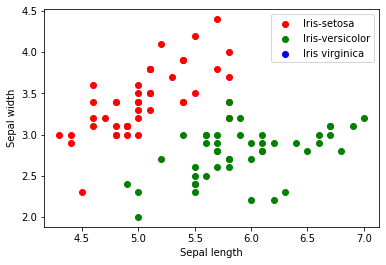

In [661]:
#scatterplot
colors=['red','green','blue']
Classification=['Iris-setosa','Iris-versicolor','Iris virginica']
for i in range(3):
    x= df[df['Classification']== Classification[i]]
    plt.scatter(x['SL'], x['SW'],  c=colors[i], label=Classification[i])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

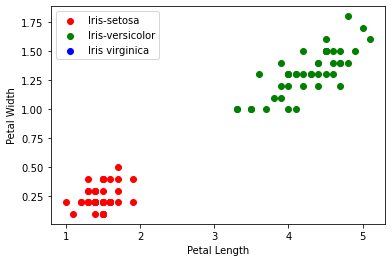

In [664]:
for i in range(3):
    x= df[df['Classification']== Classification[i]]
    plt.scatter(x['PL'], x['PW'], c=colors[i], label=Classification[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

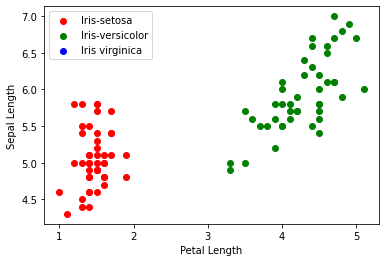

In [665]:
for i in range(3):
    x= df[df['Classification']== Classification[i]]
    plt.scatter(x['PL'], x['SL'], c=colors[i], label=Classification[i])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend()

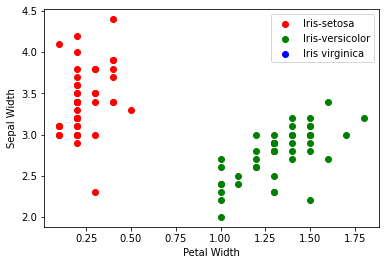

In [666]:
for i in range(3):
    x= df[df['Classification']== Classification[i]]
    plt.scatter(x['PW'], x['SW'], c=colors[i], label=Classification[i])
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.legend()

In [667]:
# COORELATION MATRIX

In [668]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.115558,0.852532,0.790916
SW,-0.115558,1.000000,-0.428465,-0.366238
PL,0.852532,-0.428465,1.000000,0.961273
PW,0.790916,-0.366238,0.961273,1.000000


<AxesSubplot:>

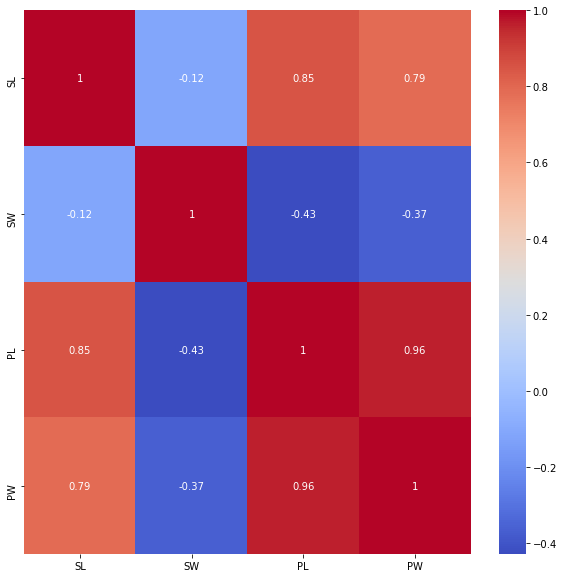

In [669]:
corr=df.corr()
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [670]:
# LABEL ENCODER

In [671]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Classification']=le.fit_transform(df['Classification'])
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [672]:
#3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


In [673]:
# MODEL TRAINING

In [674]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Classification'])
Y=df['Classification']
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.30)

In [675]:
#LOGISTIC REGRESSION

In [676]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [677]:
model.fit(x_train,y_train)

LogisticRegression()

In [678]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.23809523809523


In [679]:
#KNEIGHBORS

In [680]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [681]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [682]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.23809523809523


In [683]:
#DECISION TREE CLASSIFIER

In [684]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [685]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [686]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.23809523809523


In [687]:
#SVC

In [688]:
from sklearn.svm import SVC
model = SVC(kernel="poly",random_state=21)
model.fit(x_train,y_train)

SVC(kernel='poly', random_state=21)

In [689]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.61904761904762


In [690]:
#RANDOM FOREST CLASSIFIER

In [691]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [692]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [693]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 92.85714285714286


In [694]:
#SVC POLY

In [695]:
from sklearn.svm import SVC
model = SVC(kernel="poly",random_state=21)

In [696]:
model.fit(x_train,y_train)

SVC(kernel='poly', random_state=21)

In [697]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.61904761904762


In [698]:
#SVC LINEAR

In [699]:
model= SVC(kernel="linear",random_state=21)

In [700]:
model.fit(x_train,y_train)

SVC(kernel='linear', random_state=21)

In [701]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.23809523809523


In [702]:
#SVC RBF

In [703]:
model = SVC(kernel="rbf",random_state=21)

In [704]:
model.fit(x_train,y_train)

SVC(random_state=21)

In [705]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.61904761904762


In [706]:
#GRADIENT BOOSTING

In [707]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()

In [708]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [709]:
y_pred=model.predict(x_test)
print("Accuracy:",model.score(x_test,y_test)*100)


Accuracy: 92.85714285714286


In [710]:
#XGBCLASSIFIER

In [711]:
!pip install xgboost

In [716]:
from xgboost import XGBClassifier

In [718]:
model=XGBClassifier()
model.fit(x_train,y_train)
print("Accuracy:",model.score(x_test,y_test)*100)


G:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 97.61904761904762


In [712]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=5, criterion="gini",random_state=21)

In [713]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=21)

In [ ]:
y_pred=rfc.predict(x_train)
print(y_pred)

In [ ]:
prediction=k_svmpredict([[5,3,1.6,0.2]])
print(prediction)

In [719]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
print(x)

In [720]:
len(y_test)

42

In [721]:
print(y_test)

107    2
32     0
75     1
55     1
106    2
48     0
99     1
114    2
39     0
78     1
25     0
87     1
53     1
95     1
125    2
73     1
128    2
112    2
30     0
63     1
122    2
113    2
133    2
148    2
118    2
121    2
21     0
80     1
40     0
49     0
134    2
8      0
123    2
144    2
131    2
104    2
69     1
34     0
6      0
20     0
139    2
54     1
Name: Classification, dtype: int32
